In [269]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine
import networkx as nx

In [2]:
#Thai Font
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [270]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

# Preprocessing

In [4]:
df = pd.read_csv('customer_preference.csv')

In [5]:
df.head(5)

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,3/20/2021 11:29:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/20/2021 11:33:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,กล้วยทอด,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/20/2021 11:53:45,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
3,3/20/2021 11:54:01,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
4,3/20/2021 11:54:05,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [6]:
print(df.shape)
print(df.columns)
print(df.info())

(47, 62)
Index(['ประทับเวลา', 'จักรยานเสือภูเขา', 'คอลลาเจน', 'Brownie อวกาศ', 'แม่โขง',
       'Botox', 'กัญชา', 'กัญชง', 'เครื่องวัดความดัน', 'หลอดไฟเปลี่ยนสีได้',
       'คอร์ส bikini wax', 'เก้าอี้นวดไฟฟ้า', 'ต้นไม้ประดับห้อง', 'หมอนข้าง',
       'ตาชั่ง ', 'คอร์สโบท็อกกราม', 'แสงโสม', 'กะหรี่(ปั๊บ)', 'Lego',
       'แฟน ที่แปลว่าพัดลม', 'ยาดอง', 'ชุดนอนไม่ได้นอน',
       'ที่ยกน้ำหนัก (Dumbell)', 'เครื่องดูดฝุ่นอัตโนมัติ (robot)',
       'เนื้อวากิล', 'หมูแดดเดียว', 'drone', 'เครื่องย่อยเศษอาหาร',
       'เสื้อซีทรู', 'ไพ่ยิปซี', 'เนื้อย่าง', 'เครื่องทำลายเอกสาร', 'กระเป๋า',
       'ชาบู', 'Surfskate', 'Board game', 'เครื่องย่อยเศษอาหาร.1',
       'ชุดน้องหมา', 'Omakase', 'เม็ดมะม่วงหิมพานต์', 'ไฟอัจฉริยะ',
       'บัตตาเลี่ยนที่ตัดผม', 'ไดร์เป่าผม Dyson', 'แผ่นเสียง',
       'กรรไกรตัดขนจมูก', 'PS5', 'เครื่องตรวจน้ำตาลในเลือด', 'โรตี', 'กะปิดอง',
       'น้องหมา', 'แพ็คเกจไทยเที่ยวไทย', 'เกมส์ FIFA Online', 'มะม่วงเบา',
       'ห้องน้ำแมวอัตโนมัติ', 'กระเป๋า chanel', 'ข้าวขาหมูคา

In [244]:
df.isnull().head(5)

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [163]:
#Remove Null
df1 = df.dropna().reset_index(drop=True) 
df1 = df1.drop(['ประทับเวลา'], axis=1)
df1 = df1.drop(['เครื่องย่อยเศษอาหาร.1'], axis=1)


In [164]:
df1.head(3)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [165]:
#Replace String to Value
for i in df1.columns:
  df1[i] = df1[i].replace(['ไม่เคย'],0)
  df1[i] = df1[i].replace(['เคย'],1)

In [166]:
df1.head(3)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1


# EDA

In [245]:
df1.describe()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.0
mean,0.350000,0.550000,0.100000,0.300000,0.175000,0.15000,0.075000,0.37500,0.250000,0.075000,0.125000,0.675000,0.875000,0.650000,0.100000,0.325000,0.950000,0.650000,0.800000,0.300000,0.175000,0.62500,0.525000,0.675000,0.800000,0.125000,0.050000,0.250000,0.250000,0.725000,0.175000,1.0,1.0,0.075000,0.650000,0.350000,0.225000,0.900000,0.325000,0.175000,0.075000,0.200000,0.37500,0.050000,0.225000,0.975000,0.225000,0.200000,0.475000,0.125000,0.425000,0.075000,0.075000,0.100000,0.175000,0.37500,0.075000,0.700000,0.800000,1.0
std,0.483046,0.503831,0.303822,0.464095,0.384808,0.36162,0.266747,0.49029,0.438529,0.266747,0.334932,0.474342,0.334932,0.483046,0.303822,0.474342,0.220721,0.483046,0.405096,0.464095,0.384808,0.49029,0.505736,0.474342,0.405096,0.334932,0.220721,0.438529,0.438529,0.452203,0.384808,0.0,0.0,0.266747,0.483046,0.483046,0.422902,0.303822,0.474342,0.384808,0.266747,0.405096,0.49029,0.220721,0.422902,0.158114,0.422902,0.405096,0.505736,0.334932,0.500641,0.266747,0.266747,0.303822,0.384808,0.49029,0.266747,0.464095,0.405096,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.0
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.

In [199]:
#Check distinct Value
#อะไรไบ้างที่ทุกๆคนก็เคยซื้อ
list_all_purc = list()
print('อะไรไบ้างที่ทุกๆคนก็เคยซื้อ?')
for i in df1.columns:
  if len(df1[i].unique()) == 1 :
    list_all_purc.append(i)
    print(i)

อะไรไบ้างที่ทุกๆคนก็เคยซื้อ?
กระเป๋า
ชาบู
ครีมกันแดด


In [206]:
df2 = df1.sum().to_frame().transpose()

In [207]:
df2

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,14,22,4,12,7,6,3,15,10,3,5,27,35,26,4,13,38,26,32,12,7,25,21,27,32,5,2,10,10,29,7,40,40,3,26,14,9,36,13,7,3,8,15,2,9,39,9,8,19,5,17,3,3,4,7,15,3,28,32,40


In [208]:
df2 = df1.sum().sort_values(ascending=True).to_frame().transpose()

In [209]:
df2

,เครื่องย่อยเศษอาหาร,PS5,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,กระเป๋า chanel,ไดร์เป่าผม Dyson,ห้องน้ำแมวอัตโนมัติ,คอร์ส bikini wax,Surfskate,กัญชง,ข้าวขาหมูคากิคาจักออนไลน์,คอร์สโบท็อกกราม,Brownie อวกาศ,เก้าอี้นวดไฟฟ้า,drone,เกมส์ FIFA Online,กัญชา,ชุดนอนไม่ได้นอน,เครื่องทำลายเอกสาร,ถั่งเช่า,Botox,บัตตาเลี่ยนที่ตัดผม,น้องหมา,แผ่นเสียง,Omakase,เครื่องตรวจน้ำตาลในเลือด,กะปิดอง,เสื้อซีทรู,ไพ่ยิปซี,หลอดไฟเปลี่ยนสีได้,ยาดอง,แม่โขง,ไฟอัจฉริยะ,แสงโสม,ชุดน้องหมา,จักรยานเสือภูเขา,หมอนสุขภาพสำหรับคนนอนไม่หลับ,กรรไกรตัดขนจมูก,เครื่องวัดความดัน,มะม่วงเบา,แพ็คเกจไทยเที่ยวไทย,เครื่องดูดฝุ่นอัตโนมัติ (robot),คอลลาเจน,ที่ยกน้ำหนัก (Dumbell),Lego,ตาชั่ง,Board game,เนื้อวากิล,ต้นไม้ประดับห้อง,น้ำส้มดีโด้,เนื้อย่าง,Software ถูกลิขสิทธิ์,หมูแดดเดียว,แฟน ที่แปลว่าพัดลม,หมอนข้าง,เม็ดมะม่วงหิมพานต์,กะหรี่(ปั๊บ),โรตี,ชาบู,กระเป๋า,ครีมกันแดด
0,2,2,3,3,3,3,3,3,3,4,4,4,5,5,5,6,7,7,7,7,7,8,8,9,9,9,10,10,10,12,12,13,13,14,14,15,15,15,17,19,21,22,25,26,26,26,27,27,28,29,32,32,32,35,36,38,39,40,40,40


In [210]:
df1.shape[0]

40

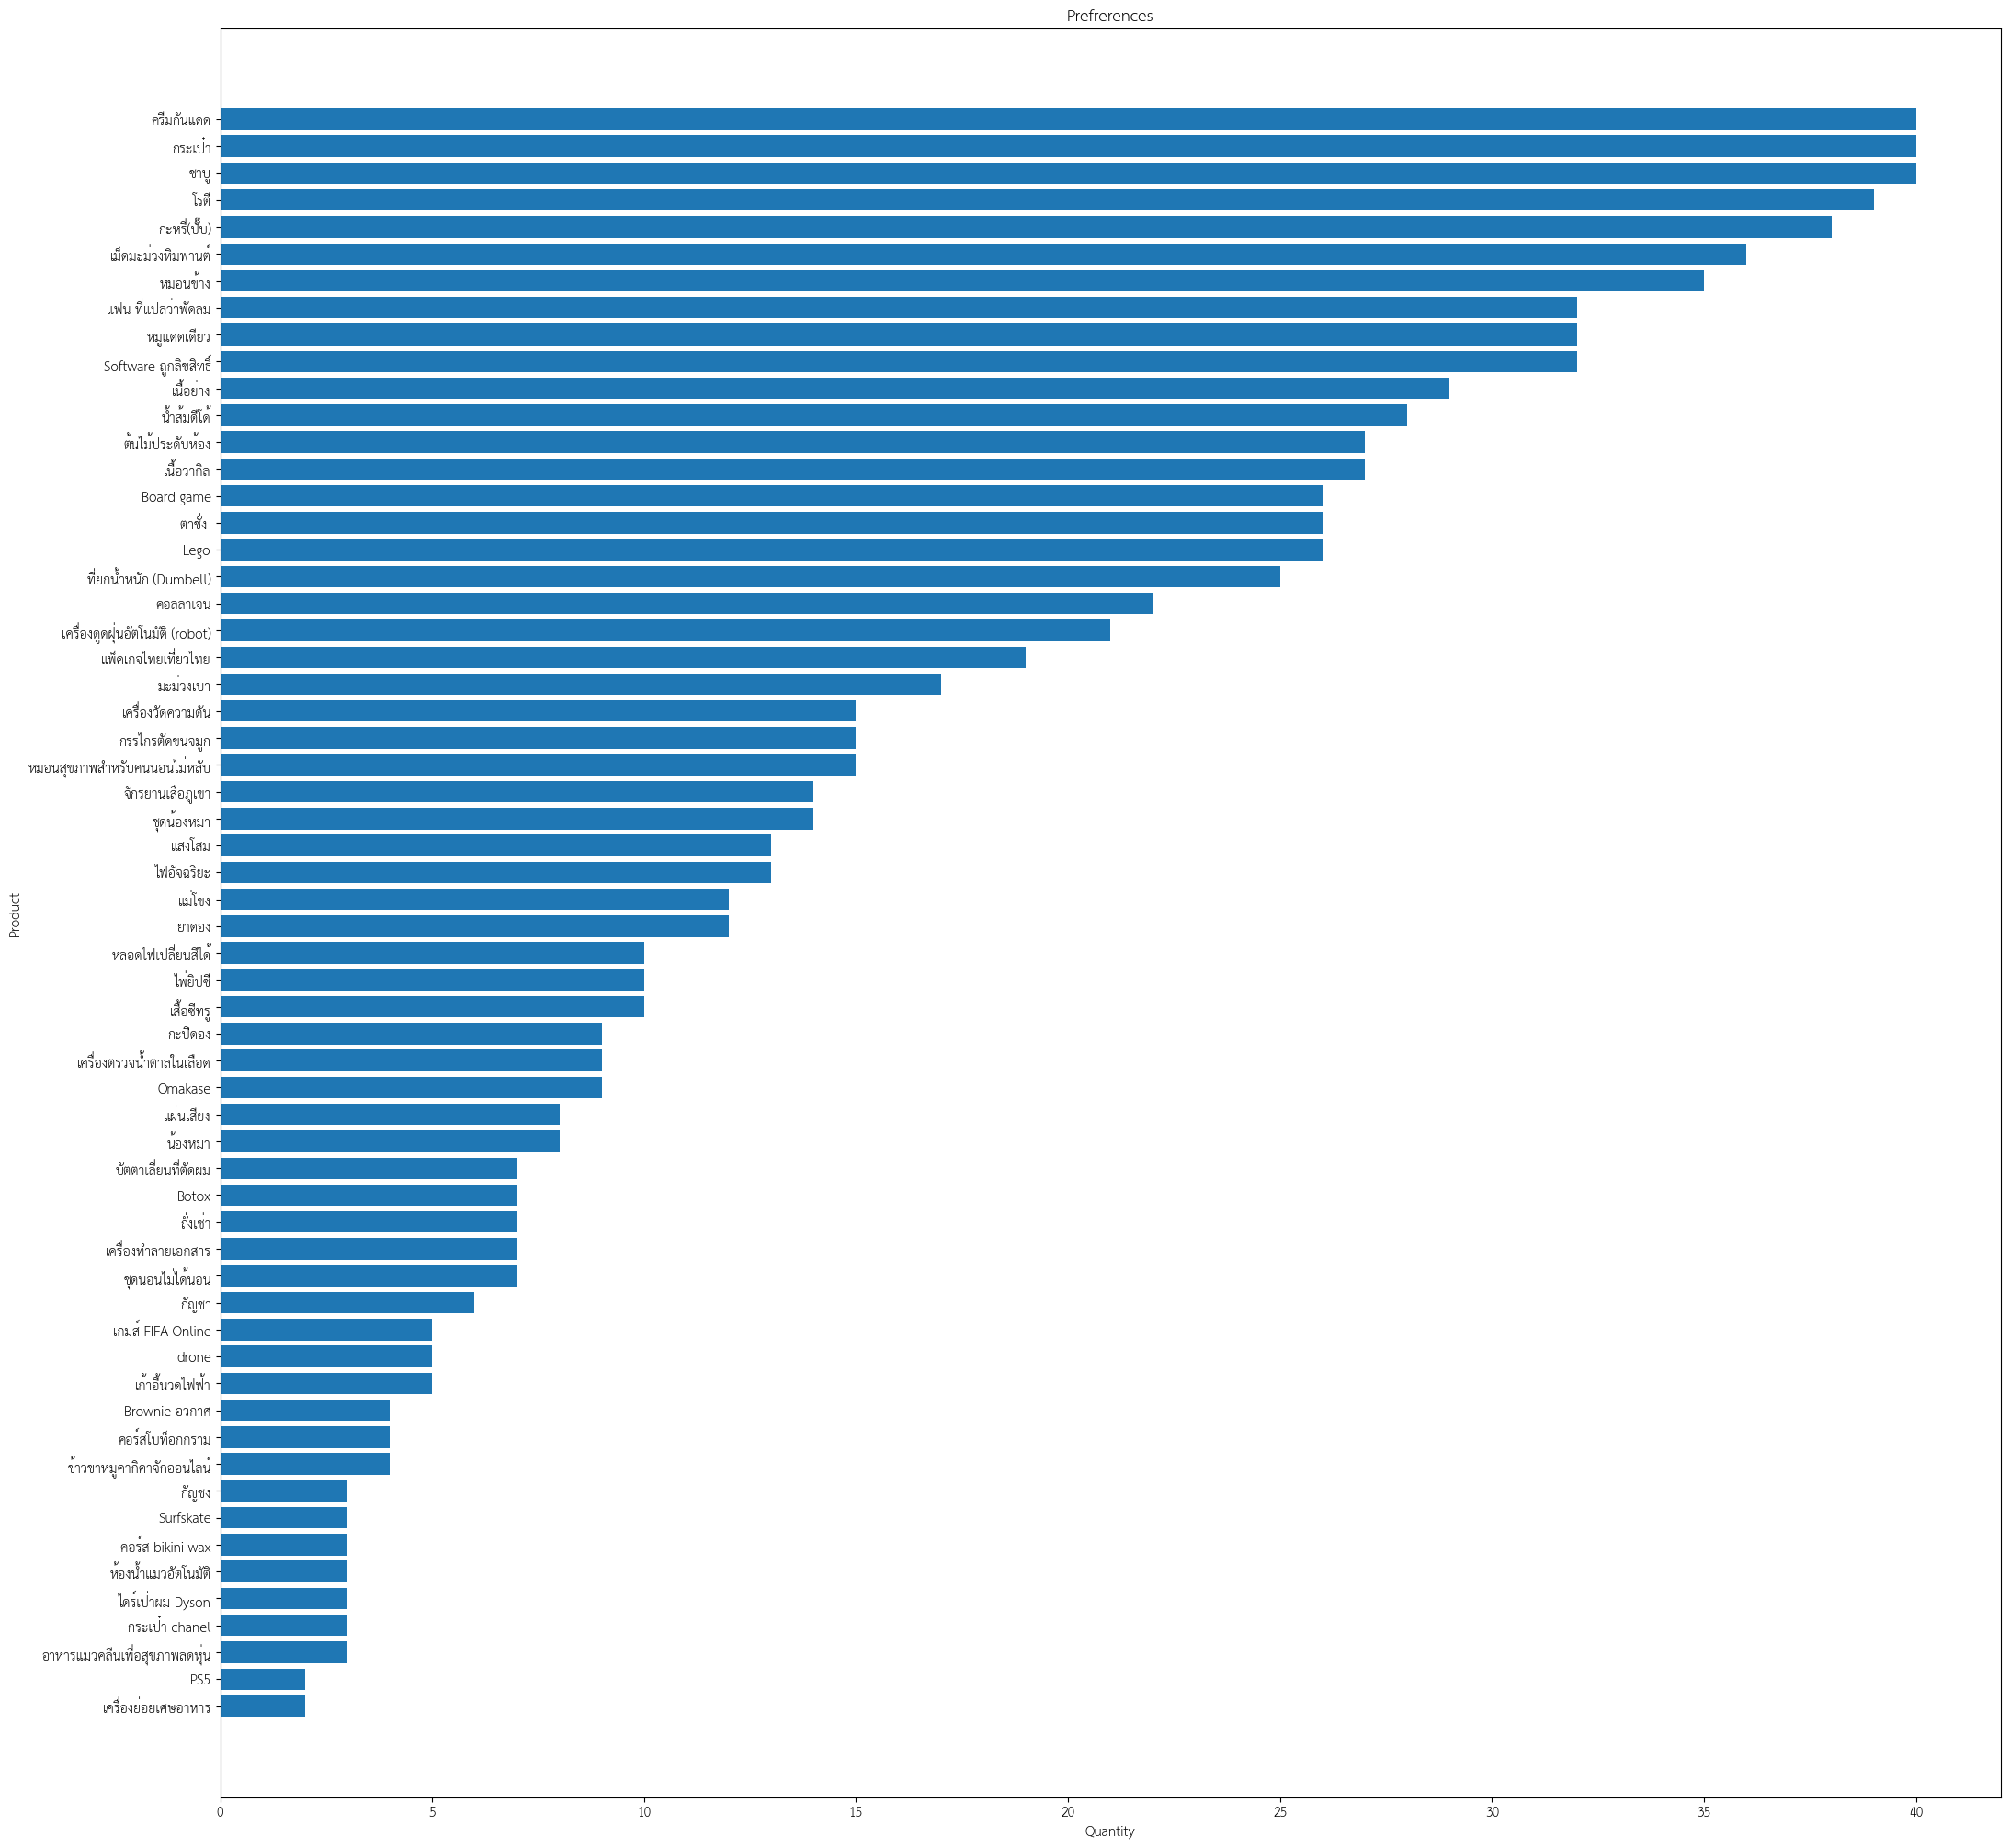

In [211]:
# Bar Chart
y = df2.columns
x = df2.sum()

plt.barh(y,x)
plt.title('Prefrerences')
plt.ylabel('Product')
plt.xlabel('Quantity')
plt.rcParams["figure.figsize"] = (25,25)
plt.show()

In [212]:
list_product = list(df2.columns)

In [213]:
list_product.reverse()

In [216]:
#Top 10 Products
n = 10
top_product = list_product[0:n]
print('สินค้าที่ใครๆ ก็เคยซื้อ',n,'อันดับ : \n',top_product)

สินค้าที่ใครๆ ก็เคยซื้อ 10 อันดับ : 
 ['ครีมกันแดด', 'กระเป๋า', 'ชาบู', 'โรตี', 'กะหรี่(ปั๊บ)', 'เม็ดมะม่วงหิมพานต์', 'หมอนข้าง', 'แฟน ที่แปลว่าพัดลม', 'หมูแดดเดียว', 'Software ถูกลิขสิทธิ์']


In [230]:
#ลบสินค้าที่ใครๆก็ซื้อ ออกไปก่อน เพราะไม่งั้น ของที่ใครๆก็ซื้อจะคู่กับทุก Item
df11 = df1.drop(top_product, axis=1)


In [231]:
df11.head(5)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,Lego,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,Surfskate,Board game,ชุดน้องหมา,Omakase,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,1,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


# Implement Collaborative Filtering 

In [232]:
#Item to Item Matrix
item_item_matrix = pd.DataFrame(index=df11.columns,columns=df11.columns)

In [233]:
item_item_matrix.head(5)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,Lego,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,Surfskate,Board game,ชุดน้องหมา,Omakase,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้
จักรยานเสือภูเขา,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
คอลลาเจน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brownie อวกาศ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
แม่โขง,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Botox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
#Calculate cosine similarity - Consine between Item to Item Profile
for i in range(0,len(item_item_matrix.columns)):
  for j in range(0,len(item_item_matrix.columns)):
    item_item_matrix.iloc[i,j] = 1 - cosine(df11.iloc[:,i],df11.iloc[:,j])

In [235]:
item_item_matrix.head(5)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,Lego,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,Surfskate,Board game,ชุดน้องหมา,Omakase,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้
จักรยานเสือภูเขา,1,0.569803,0.267261,0.385758,0.404061,0.218218,0.154303,0.483046,0.507093,0.154303,0.119523,0.514344,0.576557,0.267261,0.370625,0.576557,0.231455,0.202031,0.694879,0.583212,0.514344,0.358569,0.377964,0.338062,0.338062,0.545921,0.505076,0.46291,0.471728,0.357143,0.356348,0.667124,0.303046,0.46291,0.377964,0.552052,0.188982,0.534522,0.445435,0.377964,0.367884,0.119523,0.453743,0.46291,0.308607,0.267261,0.101015,0.483046,0.46291,0.505076
คอลลาเจน,0.569803,1,0.319801,0.369274,0.564076,0.174078,0.246183,0.440386,0.3371,0.369274,0.0953463,0.656488,0.627182,0.426401,0.354787,0.710806,0.43082,0.402911,0.682242,0.558291,0.533396,0.286039,0.301511,0.60678,0.47194,0.593856,0.402911,0.246183,0.459933,0.569803,0.355335,0.47305,0.322329,0.246183,0.376889,0.495434,0.150756,0.426401,0.497468,0.452267,0.538028,0.190693,0.568796,0.369274,0.369274,0.213201,0.241747,0.550482,0.369274,0.644658
Brownie อวกาศ,0.267261,0.319801,1,0.433013,0.377964,0.612372,0.57735,0.129099,0.158114,0.288675,0.447214,0.3849,0.294174,0.25,0.27735,0.392232,0.288675,0.188982,0.4,0.436436,0.3849,0.447214,0.353553,0.158114,0.316228,0.278543,0.188982,0.288675,0.294174,0.133631,0.333333,0.416025,0.377964,0.288675,0.53033,0.258199,0.353553,0.333333,0.333333,0.176777,0.229416,0.447214,0.242536,0.57735,0.866025,0.5,0.188982,0.387298,0.57735,0.283473
แม่โขง,0.385758,0.369274,0.433013,1,0.218218,0.471405,0.333333,0.372678,0.273861,0.166667,0.516398,0.555556,0.396297,0.144338,0.880705,0.396297,0.333333,0.327327,0.519615,0.503953,0.555556,0.387298,0.204124,0.273861,0.456435,0.482451,0.218218,0.166667,0.452911,0.0771517,0.481125,0.240192,0.327327,0.333333,0.408248,0.596285,0.204124,0.19245,0.3849,0,0.331133,0.387298,0.420084,0.5,0.333333,0.144338,0.218218,0.521749,0.333333,0.436436
Botox,0.404061,0.564076,0.377964,0.218218,1,0.154303,0.218218,0.29277,0.358569,0.218218,0.169031,0.290957,0.2965,0.755929,0.209657,0.2965,0.327327,0.428571,0.52915,0.329914,0.363696,0.169031,0.267261,0.478091,0.358569,0.350931,0.285714,0.218218,0.14825,0.303046,0.251976,0.314485,0.285714,0.218218,0.267261,0.39036,0.267261,0.503953,0.377964,0.267261,0.346844,0.169031,0.27501,0.218218,0.436436,0.377964,0.142857,0.39036,0.218218,0.285714


In [236]:
links = item_item_matrix.rename_axis('related_item',axis='columns').stack().reset_index()

In [237]:
links

,level_0,related_item,0
0,จักรยานเสือภูเขา,จักรยานเสือภูเขา,1
1,จักรยานเสือภูเขา,คอลลาเจน,0.569803
2,จักรยานเสือภูเขา,Brownie อวกาศ,0.267261
3,จักรยานเสือภูเขา,แม่โขง,0.385758
4,จักรยานเสือภูเขา,Botox,0.404061
...,...,...,...
2495,น้ำส้มดีโด้,ข้าวขาหมูคากิคาจักออนไลน์,0.188982
2496,น้ำส้มดีโด้,ถั่งเช่า,0.357143
2497,น้ำส้มดีโด้,หมอนสุขภาพสำหรับคนนอนไม่หลับ,0.634335
2498,น้ำส้มดีโด้,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,0.327327


In [249]:
links.columns = ['item','related_item','เคยซื้อร่วมกัน']

In [323]:
links_filered = links.loc[(links['เคยซื้อร่วมกัน'] > 0.6)& (links['item']!=links['related_item'])]

In [330]:
links_filered.sort_values(by=['เคยซื้อร่วมกัน'],ascending=False)

,item,related_item,เคยซื้อร่วมกัน
1270,เนื้อย่าง,เนื้อวากิล,0.929164
1025,เนื้อวากิล,เนื้อย่าง,0.929164
703,แสงโสม,แม่โขง,0.880705
164,แม่โขง,แสงโสม,0.880705
2202,กระเป๋า chanel,Brownie อวกาศ,0.866025
...,...,...,...
2468,น้ำส้มดีโด้,ที่ยกน้ำหนัก (Dumbell),0.604743
1535,Omakase,กรรไกรตัดขนจมูก,0.602464
1857,เครื่องตรวจน้ำตาลในเลือด,เครื่องวัดความดัน,0.602464
387,เครื่องวัดความดัน,เครื่องตรวจน้ำตาลในเลือด,0.602464


# Graph Visualization

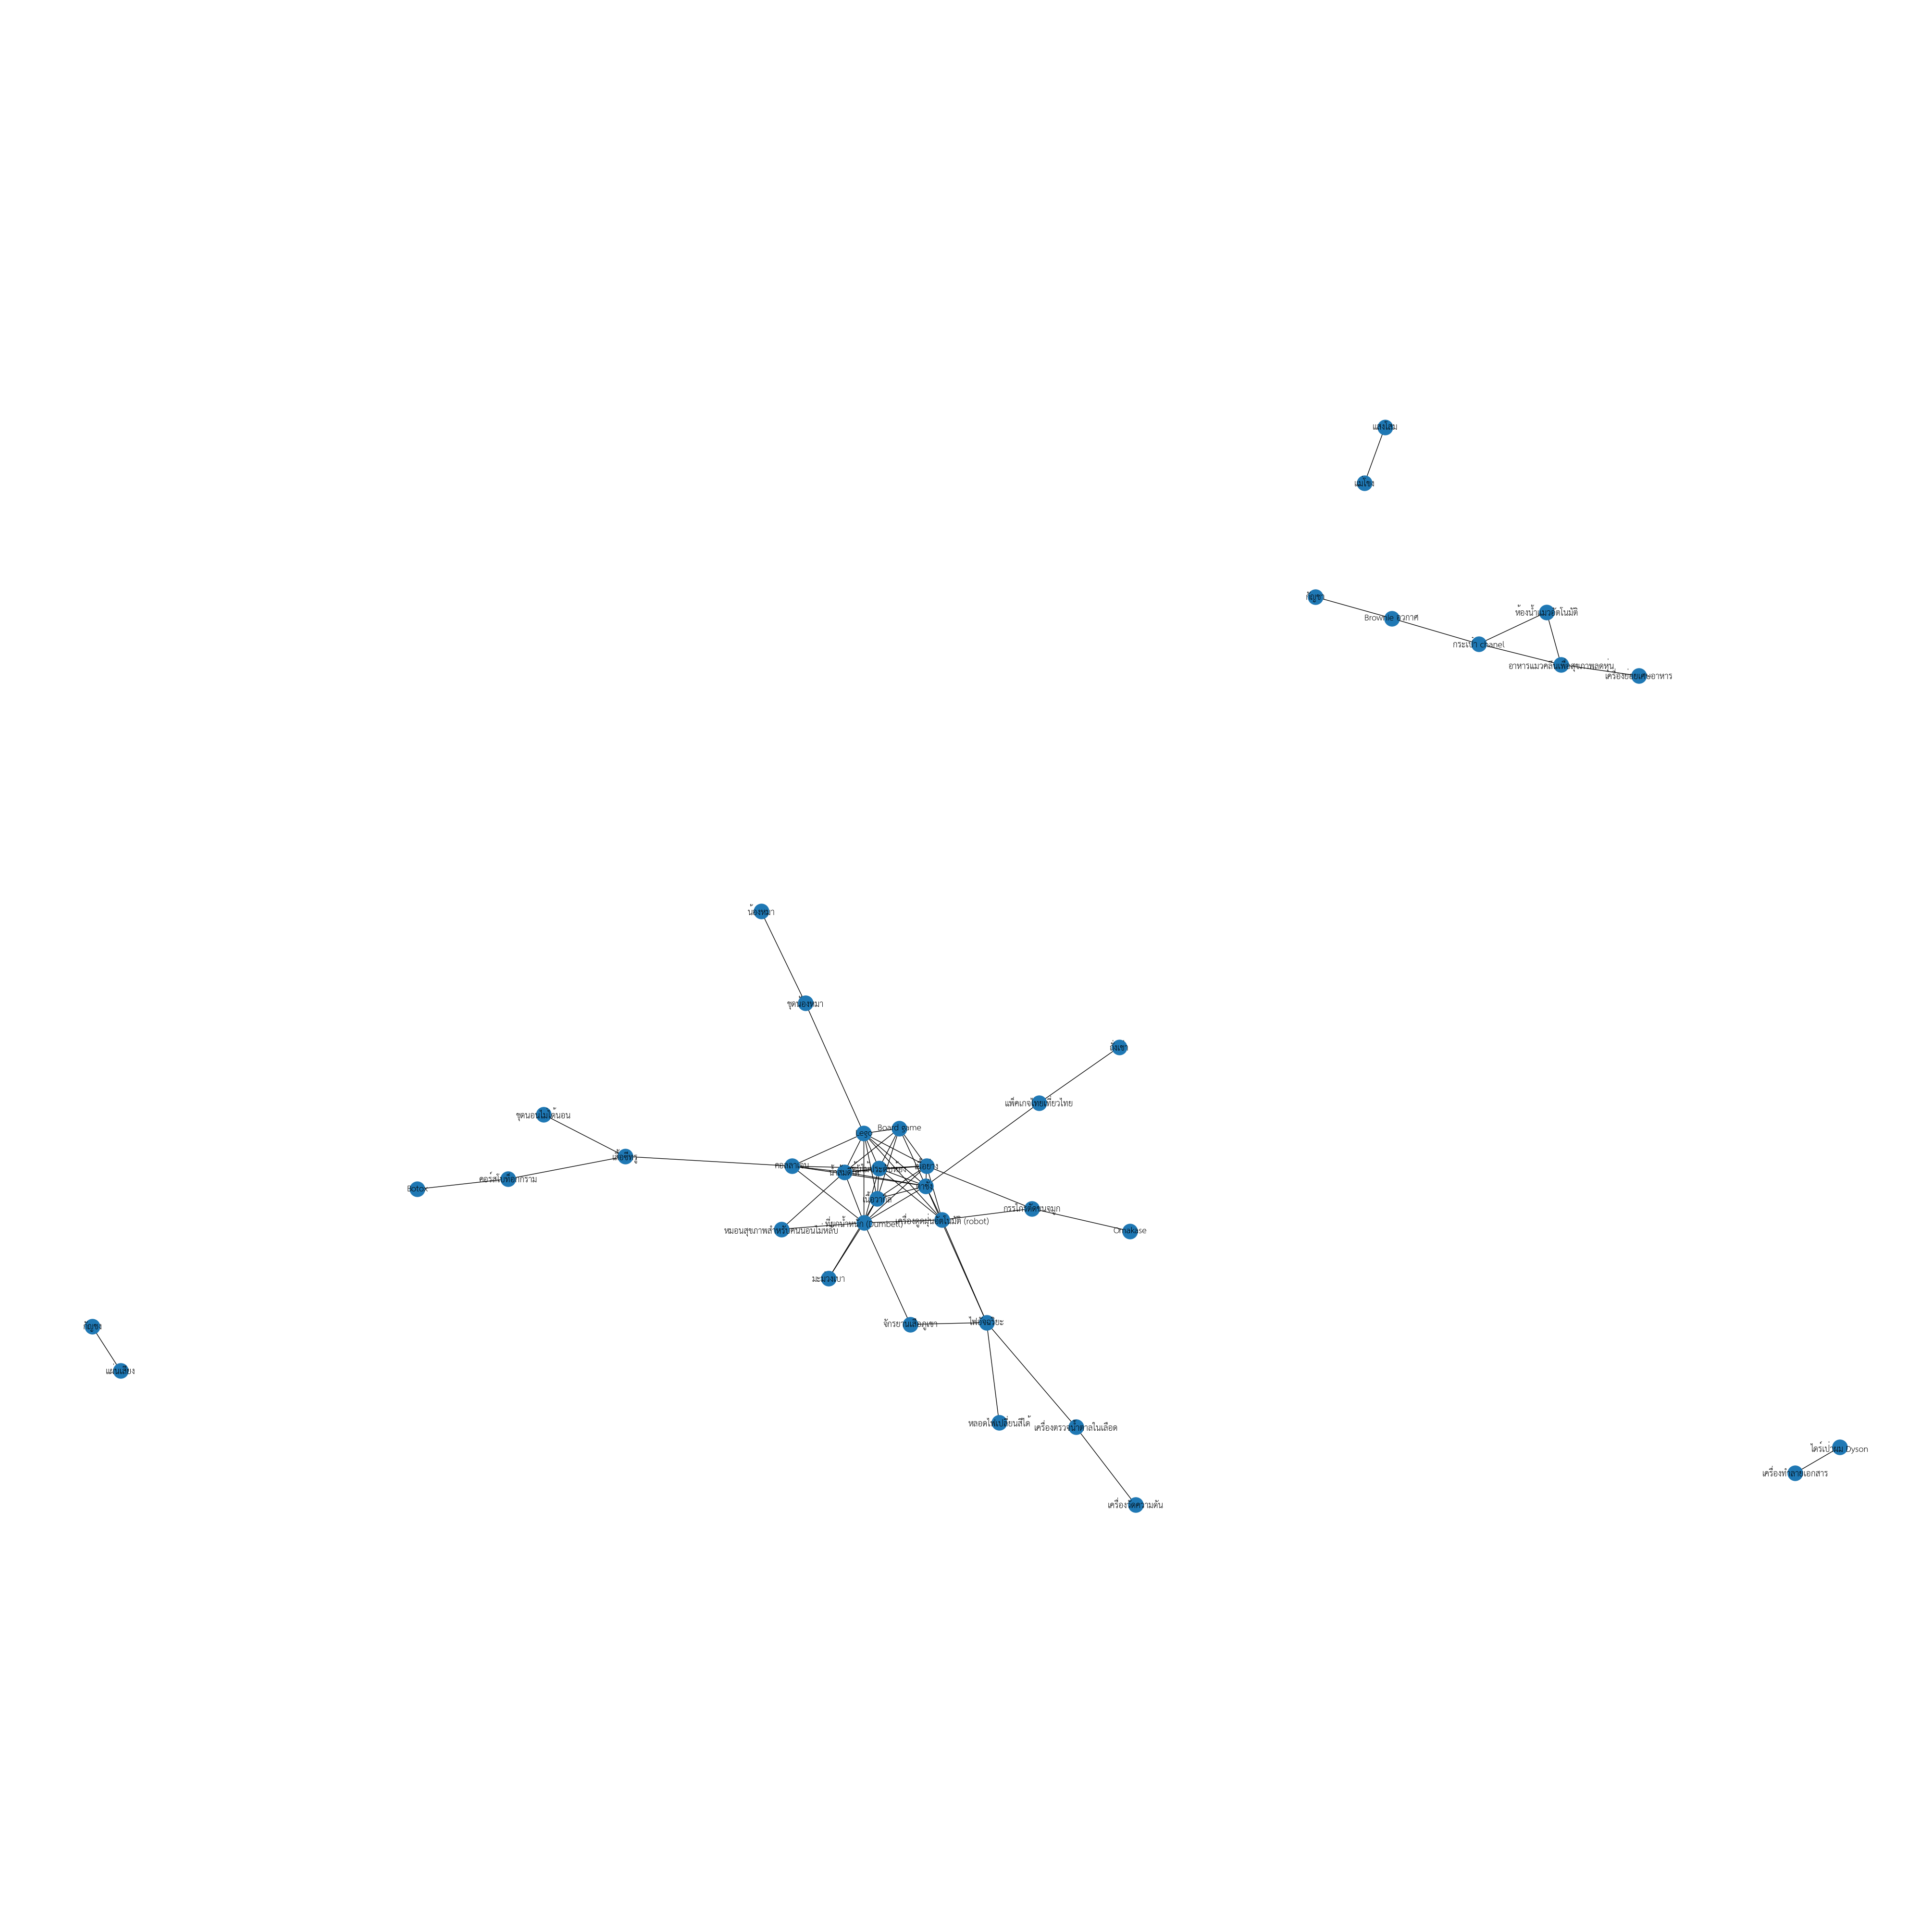

In [327]:
G = nx.from_pandas_edgelist(links_filered,source='item',target='related_item')
nx.draw(G, node_size=500,with_labels=True,font_family='TH Sarabun New') 
plt.axis('equal')
plt.rcParams["figure.figsize"] = (40,40)
plt.show() 

In [335]:
links_filered.sort_values(by=['เคยซื้อร่วมกัน'],ascending=False).head(15)

,item,related_item,เคยซื้อร่วมกัน
1270,เนื้อย่าง,เนื้อวากิล,0.929164
1025,เนื้อวากิล,เนื้อย่าง,0.929164
703,แสงโสม,แม่โขง,0.880705
164,แม่โขง,แสงโสม,0.880705
2202,กระเป๋า chanel,Brownie อวกาศ,0.866025
144,Brownie อวกาศ,กระเป๋า chanel,0.866025
565,ต้นไม้ประดับห้อง,Lego,0.830336
761,Lego,ต้นไม้ประดับห้อง,0.830336
1148,เครื่องย่อยเศษอาหาร,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,0.816497
2422,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,เครื่องย่อยเศษอาหาร,0.816497


In [338]:
links_filered.loc[(links['item'] == 'ไฟอัจฉริยะ')]

,item,related_item,เคยซื้อร่วมกัน
1587,ไฟอัจฉริยะ,เครื่องตรวจน้ำตาลในเลือด,0.64715
1562,ไฟอัจฉริยะ,ตาชั่ง,0.652714
1569,ไฟอัจฉริยะ,เครื่องดูดฝุ่นอัตโนมัติ (robot),0.66575
1550,ไฟอัจฉริยะ,จักรยานเสือภูเขา,0.667124
1558,ไฟอัจฉริยะ,หลอดไฟเปลี่ยนสีได้,0.701646


#Interpretation
หลังจาก Run Model Collaborative Filtering ด้วยการหา Consine similarity ของ Item to Item พบว่า Item ที่เคยซื้อเหมือนๆ กัน โดย ลอง Filter Item ที่ Similarity > 0.6 มีหลากหลายรูปแบบทั้ง ของชนิดที่ไม่ทางเดียวกัน แต่ของที่ไปคนละทางกัน



* 86% ของคนที่เคยซื้อ "Brownie อวกาศ" เคยซื้อ "กระเป๋า Channel"  โดยทั้ง 2 สิ่งนี้คือเป็นสิ่งดูคนละเรื่องกัน แต่ถ้าเมื่อลอง สำรวจ Graph แล้วพบว่า คนที่เคยซื้อกระเป๋า channel ยังเคยซื้อยังเคยของเกี่ยวกับแมวด้วย เช่น ห้องน้ำแมวอัตโนมัติ อาหารแมวคลีนลดหุ่น ซึ่งถ้าดูจากในวงนี้น่าจะเป็นกลุ่มที่สนใจแมว สนใจกระเป๋า Channel และสนใจกัญชา สิ่งที่ควรแนะนำกลุ่มที่ชอบซื้อ Brownie อวกาศ ให้แนะนำกระเป๋า Brandname , สิ่งของสำหรับเลี้ยงแมว

* 83% ของคนที่เคยซื้อ "ต้นไม้ประดับ" เคยซื้อ "เลโก้" ซึ่งจริงๆ แล้วคนที่เคยซื้อเลโก้ จะเคยซื้ออีกหลายๆ อย่าง ซึ่งสามารถ Recommend ให้ซื้อต่อได้ เช่น ชุดน้องหมา,น้ำส้มดีโด้ , ที่ยกน้ำหนัก, ตาชั่ง, Boardgame , Collagen , วากิว, เครื่องดูดฝุ่นอัตโนมัติ 60%-70%)

* 71% ของคนที่เคยซื้อเสื้อซีทรู เคยซื้อชุดนอนไม่ได้นอน จะอยู่ในกลุ่มที่สนใจความสวยงาม สามารถแนำผลิตภัณฑ์อื่นๆต่อได้ เช่น Botox , Collagen

* 70% ของคนเคยซื้อไฟอัจฉริยะ เคยซื้อหลอดไฟเปลี่ยนสีได้ ซึ่งจริงๆ แล้วหลอดไฟเปลี่ยนสีอาจจะเป็นส่วนหนึ่งของหลอดไฟอัจฉริยะ แต่มี Gadget อื่นที่สามารถ Recommend ได้เช่น เครื่องตรวจน้ำตาลในเลือด, ตาชั่ง เครื่องดูดฝุ่นอัตโนมัติ และจักรยานเสือภูเขา (มากกว่า 60%)
* สุดท้าย แม้ว่า แม่โขง Vs แสงโสม , เนื้อวากิล Vs เนื้อย่าง จะมีค่า Similarity ที่สูงอยู่แล้ว (มากกว่า 88%) แต่เป็นสิ่งที่เรารู้อยู่แล้ว จึงไม่ควรจะนำมาแนะนำใหม่


